<a href="https://colab.research.google.com/github/banteamlak1888/ML_project_2025/blob/main/Gradient_descent_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><font size=25, color="blue"face='Times New Roman'>Implementing Gradient Descent for  linear and logistic  regression in Pythons</font></h1>

* Gradient Descent is an iterative optimization algorithm used to find
 the parameters (weights and bias) of a model that minimize a cost function. It works by repeatedly adjusting the parameters in the direction opposite to the gradient of the cost function, which indicates the direction of the steepest ascent.




  <h1> <font  color="blue">1. Gradient Descent for Linear Regression in Python:</font></h1>
Linear Regression aims to find a linear relationship between input features and a continuous target variable. The cost function typically used is Mean Squared Error (MSE).






MSE: 78.05425344845436
R2 Score: 0.953825244172754


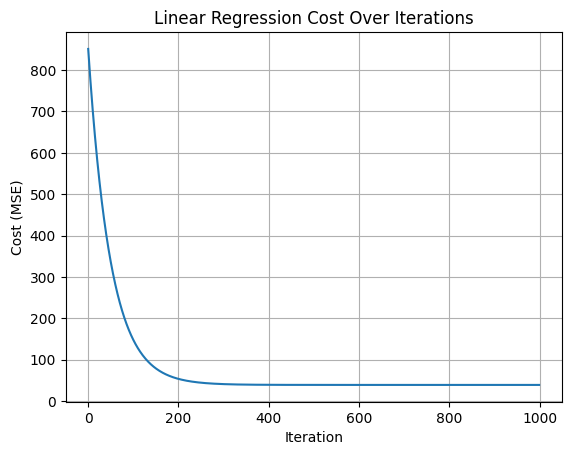

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Gradient Descent for Linear Regression
def linear_regression_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    cost_history = []

    for _ in range(n_iterations):
        y_pred = np.dot(X, w) + b
        error = y_pred - y

        dw = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)

        w -= learning_rate * dw
        b -= learning_rate * db

        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)

    return w, b, cost_history

# Predict function
def predict_linear(X, w, b):
    return np.dot(X, w) + b

# Load and scale data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
w, b, cost_history = linear_regression_gradient_descent(X_scaled, y)

# Predict and evaluate
y_pred = predict_linear(X_scaled, w, b)
print("MSE:", mean_squared_error(y, y_pred))
print("R2 Score:", r2_score(y, y_pred))

# Plot cost history
plt.plot(cost_history)
plt.title("Linear Regression Cost Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.grid()
plt.show()



  <h1> <font  color="blue">2. Gradient Descent for Logistic Regression in Python:</font></h1>Logistic Regression is used for binary classification, predicting the probability of an outcome belonging to a specific class. The cost function used is typically the Log Loss (or Binary Cross-Entropy).

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def logistic_regression_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    cost_history = []

    for _ in range(n_iterations):
        linear_model = np.dot(X, w) + b
        y_pred = sigmoid(linear_model)

        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        w -= learning_rate * dw
        b -= learning_rate * db

        cost = -(1/m) * np.sum(y*np.log(y_pred+1e-9) + (1-y)*np.log(1 - y_pred + 1e-9))
        cost_history.append(cost)

    return w, b, cost_history

# Predict function
def predict_logistic(X, w, b, threshold=0.5):
    probs = sigmoid(np.dot(X, w) + b)
    return (probs >= threshold).astype(int)

Accuracy: 0.96
Confusion Matrix:
 [[48  2]
 [ 2 48]]


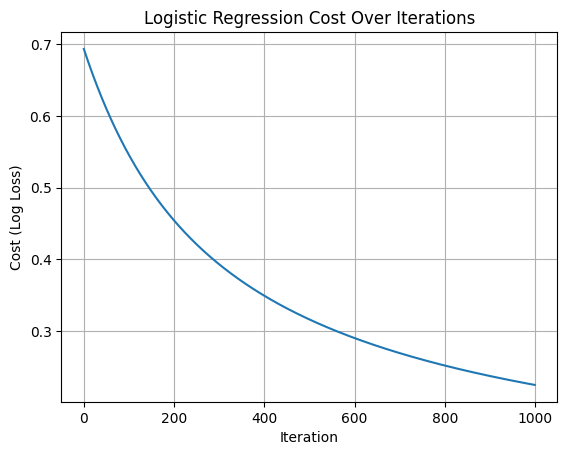

In [9]:
# Load and scale data (corrected)
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train model
w, b, cost_history = logistic_regression_gradient_descent(X_scaled, y)

# Predict and evaluate
y_pred = predict_logistic(X_scaled, w, b)
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

# Plot cost history
plt.plot(cost_history)
plt.title("Logistic Regression Cost Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost (Log Loss)")
plt.grid()
plt.show()